# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.42942274, 0.0720224 , 0.63873395])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]  # 각 요소의 곱을 더함
    return z

## Logistic Function

## $p = {1 \over 1 + e^{-z}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)  # X와 parameters의 내적 계산
    p = 1 / (1 + np.exp(-z))  # logistic 함수를 사용하여 z를 0과 1 사이의 확률 값으로 변환
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.6324861296017427

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum y_{i} \cdot \log (p_{i}) + (1 - y_{i}) \cdot \log (1 - p_{i})$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)  # X와 parameters를 로지스틱 함수에 적용하여 확률 p를 계산
    loss = -y * np.log(p) - (1 - y) * np.log(1 - p)  # 크로스 엔트로피 손실 함수를 계산
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)  # X와 parameters의 내적을 계산하여 예측값 y_hat을 얻음
    loss = (y - y_hat) ** 2  # 실제 값 y와 예측값 y_hat 사이의 평균 제곱 오차를 계산
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(np.array(X), y, parameters)  # 각 데이터 포인트에 대한 손실을 계산하고 이를 loss에 덧셈
    loss = loss / n  # 손실의 평균을 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.0386659160808533

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\sum(y_{i}-\theta^{T}X_{i})X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\sum(y_{i}-p_{i})X_{ij}$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)  # X와 parameters의 내적을 계산하여 예측값 y_hat을 얻음
        gradient = -(y - y_hat) * X[j]  # j번째 파라미터에 대한 그래디언트를 계산하며, 이는 평균 제곱 오차 손실 함수의 미분
    else:
        p = logistic(X, parameters)  # X와 parameters를 로지스틱 함수에 적용하여 확률 p를 계산
        gradient = (p - y) * X[j]  # j번째 파라미터에 대한 그래디언트를 계산하며, 이는 크로스 엔트로피 손실 함수의 미분
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.10735132480311185

In [19]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]  # 그래디언트를 저장할 리스트를 초기화
    
    for i in range(len(y_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)  # 각 파라미터에 대한 그래디언트를 계산하고 이를 gradients에 덧셈
    gradients = [gradient / X_set.shape[0] for gradient in gradients]  # 그래디언트의 평균을 계산
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[0.3142863195128066, -0.001635169844364693, 0.24339333171418806]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_idx 함수는 주어진 batch_size에 따라 훈련 데이터셋을 미니 배치의 인덱스로 분할한다. 이는 미니배치 경사하강법에서 사용된다

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (1/n)
    
    parameters -= learning_rate * np.array(gradients)
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.42940179, 0.07202251, 0.63871773])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: 전체 Dataset에 대한 gradient를 계산
SGD: 하나의 data 포인트에 대해 gradient 계산
MGD: Dataset의 작은 부분 집합에 대해 gradient를 계산
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [25]:
def gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))  # 수정된 부분

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100 epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters


## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 0.7722330838500168  params: [0.25083702 0.06982529 0.18523088]  gradients: [0.0018765364803522589, -0.00046818215949669974, 0.0010073799614200925]
epoch: 100  loss: 0.7651969840826781  params: [0.23222285 0.07452431 0.17520448]  gradients: [0.0018466564278472254, -0.0004715777797231454, 0.0009980011108248375]
epoch: 200  loss: 0.7583486312297392  params: [0.21390563 0.07925698 0.16527165]  gradients: [0.001817144134078221, -0.0004749128734638827, 0.0009886647349411455]
epoch: 300  loss: 0.7516830310115707  params: [0.19588166 0.08402268 0.15543194]  gradients: [0.0017880049356843938, -0.00047818246691736985, 0.0009793801127354032]
epoch: 400  loss: 0.7451952468080241  params: [0.17814717 0.08882072 0.14568478]  gradients: [0.0017592435025241002, -0.0004813820489612156, 0.0009701558868568188]
epoch: 500  loss: 0.738880405863715  params: [0.16069837 0.09365039 0.13602951]  gradients: [0.0017308638559985746, -0.00048450756041938957, 0.0009610000702605621]
epoch: 600  loss:

array([0.077764  , 0.11819553, 0.08919578])

In [27]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=1)
new_param_sgd

epoch: 0  loss: 0.2834523270458087  params: [-0.85375328  1.07188387 -1.20127594]  gradients: [0.25542434311718054, 0.1390021718296027, 0.17971420304493282]
epoch: 100  loss: 0.0773667235702312  params: [-1.93032558  4.17501921 -4.06769087]  gradients: [0.07538544255216892, 0.041024829940660416, 0.05304049944541617]
epoch: 200  loss: 0.07736266552236519  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.07538159521883028, 0.04102273621817768, 0.05303779249729852]
epoch: 300  loss: 0.07736266518361727  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.07538159489767143, 0.04102273604340272, 0.05303779227133413]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 600  loss: 0.07736266518359017 

array([-1.9303681 ,  4.17514311, -4.06780375])

In [28]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate=0.1, num_epoch=1000, tolerance=0.00001, model='logistic', batch_size=32) # 16은 예시이며 실제로는 데이터셋에 따라 적절한 값을 선택해야 합니다.
new_param_mgd

epoch: 0  loss: 1.0073132012185264  params: [0.92334923 0.24636189 0.03833244]  gradients: [0.01868990059152433, 0.006695765439599593, 0.01588330720990155]
epoch: 100  loss: 0.7293219227899581  params: [ 0.31117623  0.32507999 -0.21054638]  gradients: [0.012307808999224524, 0.0038771331979385562, 0.01208398183291247]


array([-0.05867194,  0.4206728 , -0.37559308])

### Predict Label

In [29]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [30]:
from sklearn.metrics import *

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[13, 27],
       [ 1,  9]], dtype=int64)

In [32]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.44


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [33]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [34]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [35]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.60632641, 2.64360575])

In [36]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate=0.01, num_epoch=1000, tolerance=0.00001, model='linear', batch_size=32)
new_param

epoch: 0  loss: 4.191891184711165  params: [0.17344976 0.75452823]  gradients: [-0.07594059206687637, -0.05059219172883662]
epoch: 100  loss: 3.2557474392903205  params: [0.38906949 0.88965815]  gradients: [-0.06287881952620802, -0.042984567146062615]
epoch: 200  loss: 2.623551294626091  params: [0.56127308 1.00126039]  gradients: [-0.05235841958932208, -0.036843023887142466]
epoch: 300  loss: 2.193164477369027  params: [0.69852185 1.09387932]  gradients: [-0.043885092852402156, -0.03188256979087464]
epoch: 400  loss: 1.8974190811084481  params: [0.80763119 1.17117584]  gradients: [-0.03706067972854433, -0.027873640991261515]
epoch: 500  loss: 1.6920133105133628  params: [0.89409076 1.23609917]  gradients: [-0.03156446155072652, -0.024631321306950272]
epoch: 600  loss: 1.5476232032547061  params: [0.96232228 1.29102526]  gradients: [-0.02713809855216422, -0.022006658425692438]
epoch: 700  loss: 1.4447566320872576  params: [1.01588729 1.3378683 ]  gradients: [-0.023573497362703057, -0.0

array([1.11437356, 1.44359314])

In [37]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

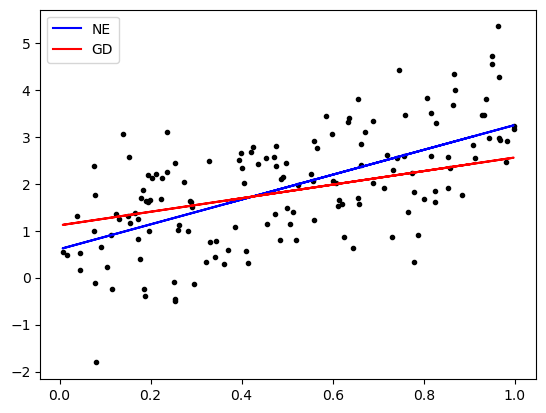

In [38]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()